# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


data_frame = pd.read_csv('data_frame_ml.csv')
X = data_frame.drop('mau', axis=1)  # Variáveis explicativas
y = data_frame[['mau']]  # Variável resposta

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=100)


print("Dimensões do conjunto de treinamento:", X_train.shape)
print("Dimensões do conjunto de validação:", X_val.shape)


Dimensões do conjunto de treinamento: (11655, 28)
Dimensões do conjunto de validação: (4995, 28)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

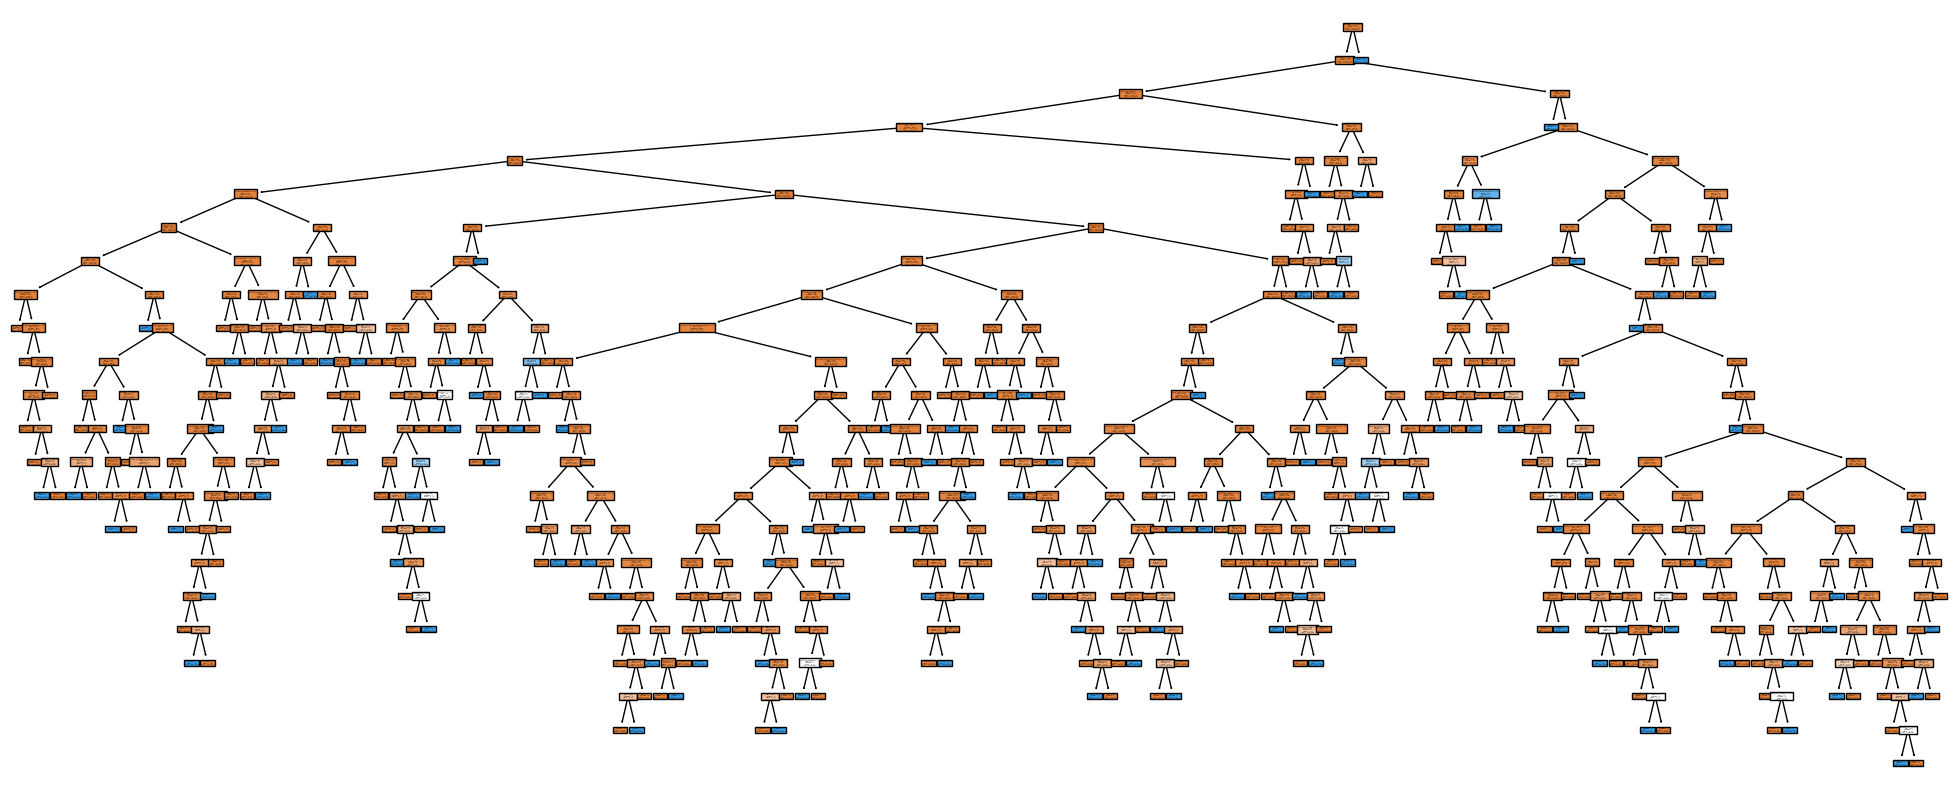

In [6]:
# Vizualização da árvore
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
plt.figure(figsize=(25,10))
plot_tree(decision_tree,feature_names=X_train.columns, class_names=['aprovados','reprovados'], filled=True)
plt.show()

In [7]:
# Matriz de confusão
y_pred = decision_tree.predict(X_train)
confusion = pd.DataFrame(confusion_matrix(y_train,y_pred), index=['Aprovados','Reprovados'], columns=['Aprovados','Reprovados'])
# Calculando Acuracia
y_train_pred = decision_tree.predict(X_train)
train_acuracy = accuracy_score(y_train,y_train_pred)
print('Acuracia na Base de Treinamento:',train_acuracy)
print('Matriz de Confusão')
confusion

Acuracia na Base de Treinamento: 1.0
Matriz de Confusão


,Aprovados,Reprovados
Aprovados,11392,0
Reprovados,0,263


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [10]:
# Aplicando Algoritmo que foi treinado em X_train na Base de TESTE X_val
y_pred = decision_tree.predict(X_val)
confusion = pd.DataFrame(confusion_matrix(y_val,y_pred), index=['Aprovados','Reprovados'], columns=['Aprovados','Reprovados'])
y_val_pred = decision_tree.predict(X_val)
val_acuracy = accuracy_score(y_val,y_val_pred)
print('Acuracia na Base de Teste:',val_acuracy)
print('Matriz de Confusão')
confusion



Acuracia na Base de Teste: 0.9767767767767768
Matriz de Confusão


,Aprovados,Reprovados
Aprovados,4809,59
Reprovados,57,70


In [39]:
# Treinar uma nova árvore com parâmetros específicos
new_decision_tree = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
new_decision_tree.fit(X_train, y_train)
# Avaliar a matriz de confusão
y_test_pred_new = new_decision_tree.predict(X_val)
confusion_new = pd.DataFrame(confusion_matrix(y_val, y_test_pred_new), index=['aprovados','reprovados'], columns=['aprovados','reprovados'])
confusion_new
# Proporção de proponentes classificados como 'maus'
proporcao_maus = confusion_new.loc['reprovados', 'reprovados'] / (confusion_new.loc['reprovados', 'reprovados'] + confusion_new.loc['aprovados', 'reprovados'])

print("Proporção de proponentes classificados como 'maus':{}".format( proporcao_maus))
confusion_new


Proporção de proponentes classificados como 'maus':0.9642857142857143


,aprovados,reprovados
aprovados,4866,2
reprovados,73,54


In [40]:
# Acurácia se todos os contratos fossem classificados como 'bons'
todos_bons_accuracy = accuracy_score(y_val, ['bons'] * len(y_val))
print("Acurácia se todos os contratos fossem classificados como 'bons':", todos_bons_accuracy)

Acurácia se todos os contratos fossem classificados como 'bons': 0.0


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:227: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


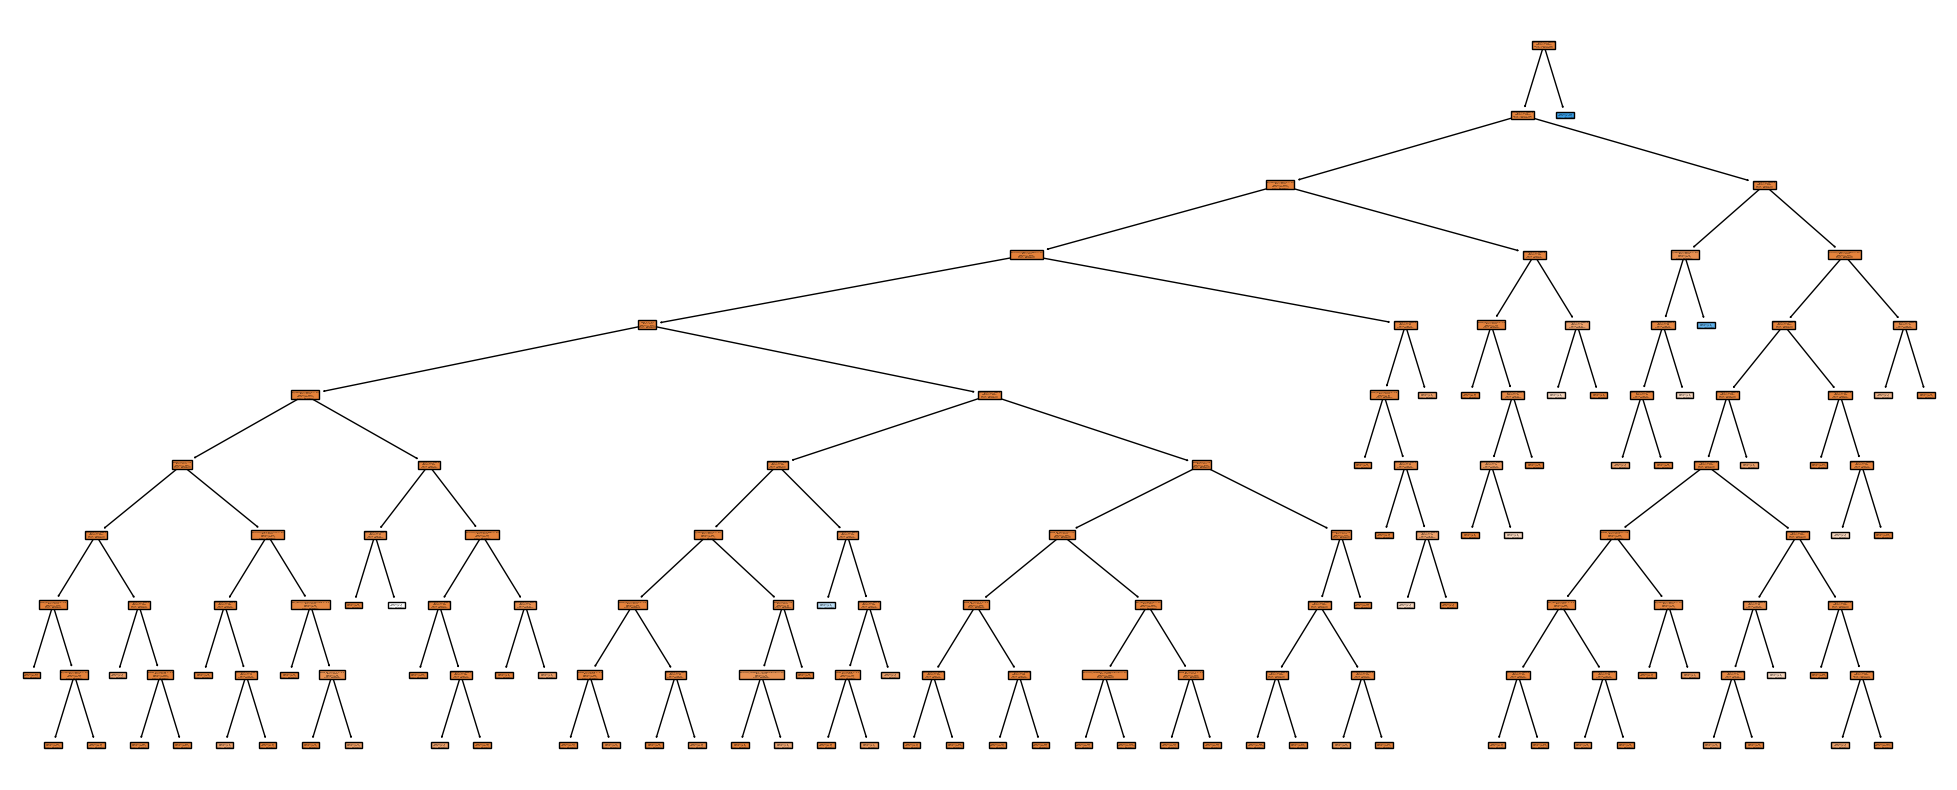

In [41]:
# a nova arvore (extra)
plt.figure(figsize=(25,10))
plot_tree(new_decision_tree,feature_names=X_val.columns, class_names=['aprovados','reprovados'], filled=True)
plt.show()